In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 

- plot variance of ubar and divF (level, lat)

- plot corr(ubar, N3.4) on (level, lat) - N34 doesnt change every grid point

- EFP for summer (all hemis and seasons)

- polar vortex u @ 10hPa, 60N

In [2]:
# import dataset
ds = xr.open_mfdataset('/home/links/ct715/eddy_feedback/daily_datasets/jra55_djf_ep.nc',
                            parallel=True, chunks={'time': 31})
ds

<xarray.Dataset>
Dimensions:  (time: 5325, lon: 144, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    v        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    u        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ubar     (level, lat) float32 dask.array<chunksize=(37, 73), meta=np.ndarray>

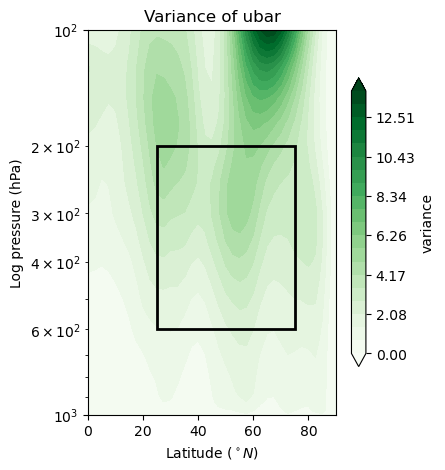

In [ ]:
ef.plot_variance(ds, latitude='NH')

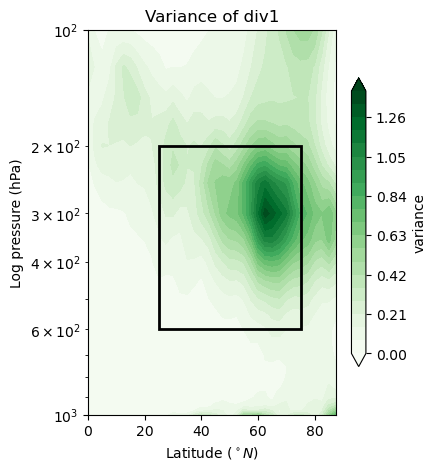

In [ ]:
ef.plot_variance(ds, variable='div1', latitude='NH')

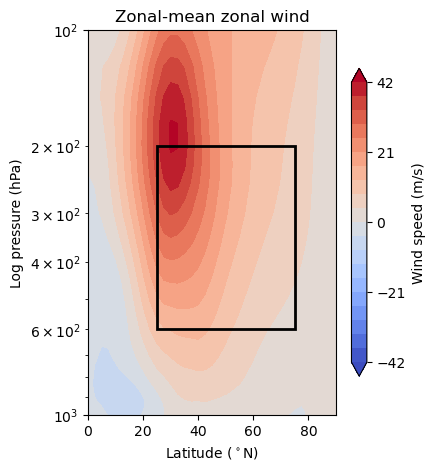

In [8]:
ef.plot_ubar(ds, show_rect=True, latitude='NH', yscale='log', top_atmos=100.)

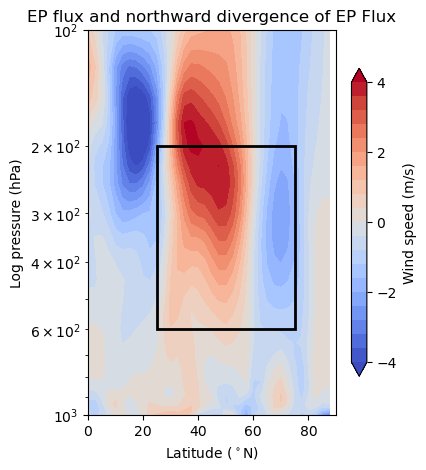

In [9]:
ef.plot_epfluxes_div(ds, plot_arrows=False, latitude='NH', show_rect=True, top_atmos=100., yscale='log')